In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import datetime
from datetime import date, timedelta

In [32]:
cluster_df = pd.read_csv("clusters.csv", usecols = ['date_announced','state','cases_active','cluster'])
cluster_df2 = pd.read_csv("clusters.csv", usecols = ['date_announced','state','deaths','cluster'])
cluster_df

cluster  ... cases_active
0                          KLUSTER WARGA JEPUN  ...            0
1                                  KLUSTER UDA  ...            0
2     KLUSTER KEAGAMAAN (TABLIGH SRI PETALING)  ...            0
3                    KLUSTER TABLIGH NEW DELHI  ...            0
4                                KLUSTER AIROD  ...            0
...                                        ...  ...          ...
6138                   KLUSTER PARIT CHE MANJA  ...           15
6139                    KLUSTER JALAN HAMILTON  ...           12
6140         KLUSTER KAMPUNG TOK PANJANG SAUDI  ...            7
6141      KLUSTER SIMPANG PINGGIRAN TONGKANG 2  ...           22
6142                      KLUSTER JALAN DURIAN  ...           16

[6143 rows x 4 columns]

In [3]:
cluster_df2

cluster  ... deaths
0                          KLUSTER WARGA JEPUN  ...      0
1                                  KLUSTER UDA  ...      2
2     KLUSTER KEAGAMAAN (TABLIGH SRI PETALING)  ...     34
3                    KLUSTER TABLIGH NEW DELHI  ...      0
4                                KLUSTER AIROD  ...      0
...                                        ...  ...    ...
6138                   KLUSTER PARIT CHE MANJA  ...      0
6139                    KLUSTER JALAN HAMILTON  ...      0
6140         KLUSTER KAMPUNG TOK PANJANG SAUDI  ...      0
6141      KLUSTER SIMPANG PINGGIRAN TONGKANG 2  ...      0
6142                      KLUSTER JALAN DURIAN  ...      0

[6143 rows x 4 columns]

In [33]:
cluster_df = cluster_df.loc[cluster_df['state'].isin(['12'])]
cluster_df

cluster state date_announced  cases_active
25    KLUSTER TABLIGH MAKASAR, INDONESIA    12     2020-04-16             0
27                      KLUSTER PAKISTAN    12     2020-04-16             0
31       KLUSTER PETUGAS KESIHATAN SABAH    12     2020-04-18             0
48                     KLUSTER IPT SABAH    12     2020-05-13             0
65                           KLUSTER MDR    12     2020-06-17             0
...                                  ...   ...            ...           ...
6047                 KLUSTER PUNCAK ILMU    12     2021-12-14             3
6052      KLUSTER JALAN LABUK BATU TUJUH    12     2021-12-15             3
6086             KLUSTER MILLENIUM SAUDI    12     2021-12-22             3
6099            KLUSTER BAHTERA KINABALU    12     2021-12-25            64
6134              KLUSTER JALAN KEM BINA    12     2022-01-03            40

[400 rows x 4 columns]

In [5]:
cluster_df2 = cluster_df2.loc[cluster_df2['state'].isin(['12'])]
cluster_df2

cluster state date_announced  deaths
25    KLUSTER TABLIGH MAKASAR, INDONESIA    12     2020-04-16       1
27                      KLUSTER PAKISTAN    12     2020-04-16       0
31       KLUSTER PETUGAS KESIHATAN SABAH    12     2020-04-18       0
48                     KLUSTER IPT SABAH    12     2020-05-13       0
65                           KLUSTER MDR    12     2020-06-17       1
...                                  ...   ...            ...     ...
6047                 KLUSTER PUNCAK ILMU    12     2021-12-14       0
6052      KLUSTER JALAN LABUK BATU TUJUH    12     2021-12-15       0
6086             KLUSTER MILLENIUM SAUDI    12     2021-12-22       0
6099            KLUSTER BAHTERA KINABALU    12     2021-12-25       0
6134              KLUSTER JALAN KEM BINA    12     2022-01-03       0

[400 rows x 4 columns]

In [31]:
cluster_df = cluster_df.loc[ ( cluster_df['date_announced'] >= '2020-12-01') & (cluster_df['date_announced'] <= '2021-02-28' )]
cluster_df

Empty DataFrame
Columns: [cluster, state, date_announced, cases_active]
Index: []

In [7]:
cluster_df2 = cluster_df2.loc[ ( cluster_df2['date_announced'] >= '2020-12-01') & (cluster_df['date_announced'] <= '2021-02-28' )]
cluster_df2

cluster state date_announced  deaths
362   KLUSTER VIEW KOLOMBONG    12     2020-12-01       0
363    KLUSTER TALANG-TALANG    12     2020-12-01       0
370     KLUSTER JALAN KILANG    12     2020-12-03       0
371     KLUSTER JALAN KUBOTA    12     2020-12-03       0
372     KLUSTER PERDANA ENAM    12     2020-12-03       0
...                      ...   ...            ...     ...
1054     KLUSTER SINGGAHMATA    12     2021-02-19       0
1059     KLUSTER JALAN PASAR    12     2021-02-20       0
1086     KLUSTER TAMAN MAWAR    12     2021-02-23       0
1102       KLUSTER SINSINGON    12     2021-02-24       2
1114   KLUSTER MEROTAI BESAR    12     2021-02-26       0

[68 rows x 4 columns]



*   cases_active = cases active within the cluster
*   deaths = death within cluster


In [34]:
cluster_df.drop(cluster_df.loc[cluster_df['cases_active']==0].index, inplace=True)
cluster_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


cluster state date_announced  cases_active
6003      KLUSTER JALAN TUARAN BAKUT    12     2021-12-08             1
6047             KLUSTER PUNCAK ILMU    12     2021-12-14             3
6052  KLUSTER JALAN LABUK BATU TUJUH    12     2021-12-15             3
6086         KLUSTER MILLENIUM SAUDI    12     2021-12-22             3
6099        KLUSTER BAHTERA KINABALU    12     2021-12-25            64
6134          KLUSTER JALAN KEM BINA    12     2022-01-03            40

In [9]:
indexNames2 = cluster_df2[cluster_df2['deaths'] == 0].index
 
cluster_df2.drop(indexNames2 , inplace=True)

cluster_df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


cluster state date_announced  deaths
385            KLUSTER JALAN DOMIS    12     2020-12-05       1
437                 KLUSTER BRUMAS    12     2020-12-19       1
571                 KLUSTER KAURAN    12     2021-01-08       2
583           KLUSTER JALAN SIBUGA    12     2021-01-10       1
650       KLUSTER TAMAN IKAN JINAK    12     2021-01-17       1
831      KLUSTER LADANG SUNGAI PIN    12     2021-02-01       1
931   KLUSTER LORONG BERSATU DAMAI    12     2021-02-10       2
978           KLUSTER PATIKANG ULU    12     2021-02-14       1
1102             KLUSTER SINSINGON    12     2021-02-24       2

['6003', '6134', '6099']


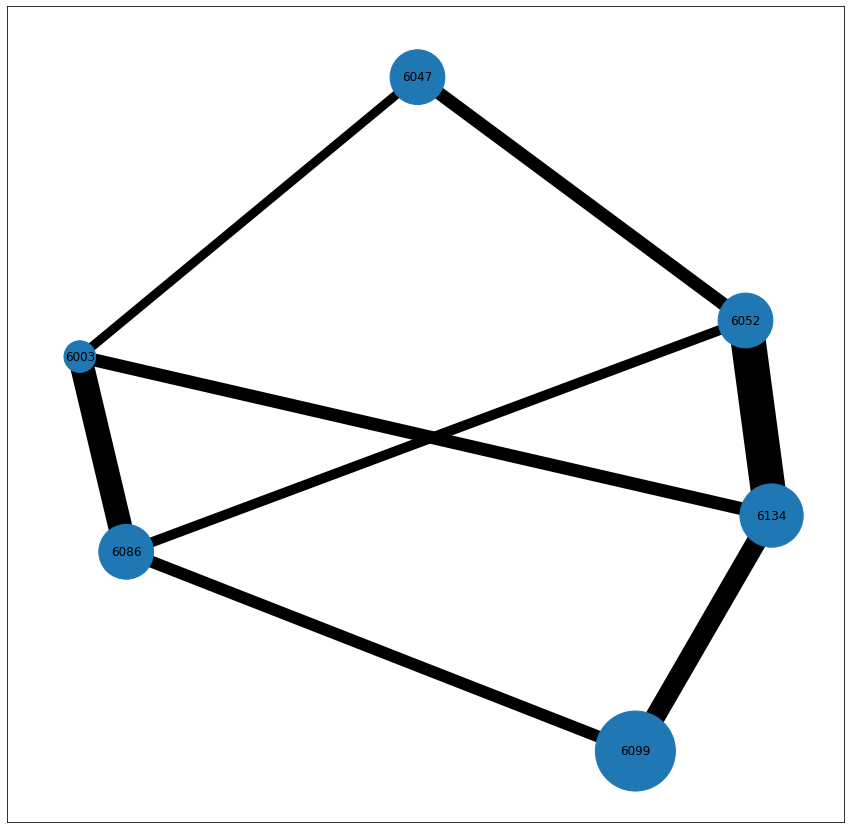

In [29]:
# nodes for active case

# the label in nodes is the row number of the cluster in the dataset


G = nx.Graph()
G.add_edge('6003','6047', weight=9) #the weight here we can put the distance
G.add_edge('6047','6052', weight=13)
G.add_edge('6052','6086', weight=10)
G.add_edge('6086','6099', weight=12)
G.add_edge('6099','6134', weight=20)
G.add_edge('6134','6003', weight=8)
G.add_edge('6052','6134', weight=35)
G.add_edge('6003','6086', weight=24)
G.add_edge('6134','6003', weight=13)


#we can put the number of active cases here to alter the size of the node
#maybe we can multiply the cases by 10/100 to show the node bigger

G.nodes['6003']['weight'] = 1000     # cases = 1
G.nodes['6047']['weight'] = 3000     # cases = 3
G.nodes['6052']['weight'] = 3000     # cases = 3
G.nodes['6086']['weight'] = 3000     # cases = 3
G.nodes['6099']['weight'] = 6400    # cases = 64
G.nodes['6134']['weight'] = 4000    # cases = 40

plt.figure(figsize=(15,15))

edge_weight = list(nx.get_edge_attributes(G,'weight').values())
node_weight = list(nx.get_node_attributes(G,'weight').values())

nx.draw_networkx(G, width=edge_weight, node_size=node_weight)


print(nx.dijkstra_path(G,source='6003',target='6099', weight='weight'))

plt.savefig('Active_CasesNX.png')

['385', '931']


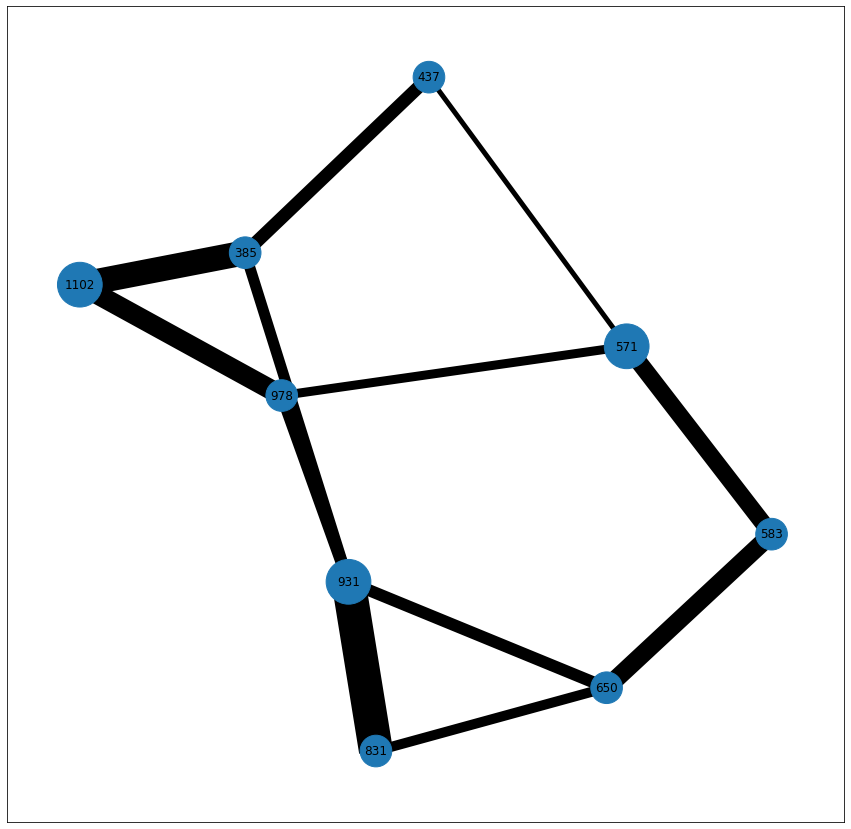

In [30]:
#nodes for deaths
G = nx.Graph()
G.add_edge('385','437', weight=13)
G.add_edge('437','571', weight=5)
G.add_edge('571','583', weight=17)
G.add_edge('583','650', weight=18)
G.add_edge('650','831', weight=10)
G.add_edge('831','931', weight=34)
G.add_edge('931','978', weight=12)
G.add_edge('978','1102', weight=20)
G.add_edge('1102','385', weight=25)
G.add_edge('385','931', weight=11)
G.add_edge('571','978', weight=9)
G.add_edge('931','650', weight=12)



G.nodes['385']['weight'] = 1000    #death = 1
G.nodes['437']['weight'] = 1000    #death = 1
G.nodes['571']['weight'] = 2000    #death = 2
G.nodes['583']['weight'] = 1000    #death = 1
G.nodes['650']['weight'] = 1000    #death = 1
G.nodes['831']['weight'] = 1000    #death = 1
G.nodes['931']['weight'] = 2000    #death = 2 
G.nodes['978']['weight'] = 1000    #death = 1
G.nodes['1102']['weight'] = 2000   #death = 2

plt.figure(figsize=(15,15))

edge_weight = list(nx.get_edge_attributes(G,'weight').values())
node_weight = list(nx.get_node_attributes(G,'weight').values())

nx.draw_networkx(G, width=edge_weight, node_size=node_weight)

print(nx.dijkstra_path(G,source='385',target='931', weight='weight'))

plt.savefig('DeathsNX.png')